In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import nltk.stem
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/sms_spam_cleaned.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    return tokens

In [ ]:
# A TF-IDF Vectorizer with Stemming
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')

X_train = vectorizer.fit_transform(df['msg'])
print(f"Total Features in TF-IDF: {X_train.shape[1]}")

y = df['type']


Total Features in TF-IDF: 6859


In [ ]:
#Question 1
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=10, verbose=1, random_state=42)
km.fit(X_train)
df["cluster"] = km.predict(X_train)
df["type_num"] = df["type"].map({"ham": 1, "spam": 0})

Initialization complete
Iteration 0, inertia 10522.417912062107.
Iteration 1, inertia 5236.305518688747.
Iteration 2, inertia 5235.661858331101.
Iteration 3, inertia 5235.600492264886.
Iteration 4, inertia 5235.56802287105.
Iteration 5, inertia 5235.53132616909.
Iteration 6, inertia 5235.519959887789.
Iteration 7, inertia 5235.472564422791.
Iteration 8, inertia 5235.4566881085175.
Iteration 9, inertia 5235.450033422734.
Iteration 10, inertia 5235.440020896151.
Iteration 11, inertia 5235.435110144436.
Iteration 12, inertia 5235.425952987753.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 10425.607974257364.
Iteration 1, inertia 5231.653046645516.
Iteration 2, inertia 5230.516517942264.
Iteration 3, inertia 5230.0067976473865.
Iteration 4, inertia 5229.73574112918.
Iteration 5, inertia 5229.570787914111.
Iteration 6, inertia 5229.513099877291.
Iteration 7, inertia 5229.4966525732925.
Iteration 8, inertia 5229.473510905079.
Iteration 9, inertia

In [ ]:
cluster_mapping = {df.groupby('cluster')['type_num'].mean().idxmax(): 1,
                   df.groupby('cluster')['type_num'].mean().idxmin(): 0}


df['prediction'] = df['cluster'].map(cluster_mapping)
print(df['prediction'])
accuracy = accuracy_score(df['type_num'], df['prediction'])
precision = precision_score(df['type_num'], df['prediction'])
recall = recall_score(df['type_num'], df['prediction'])
f1 = f1_score(df['type_num'], df['prediction'])

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

0       0
1       1
2       0
3       0
4       0
       ..
5299    0
5300    0
5301    0
5302    0
5303    0
Name: prediction, Length: 5304, dtype: int64
Accuracy: 0.166
Precision: 1.000
Recall: 0.042
F1 Score: 0.080


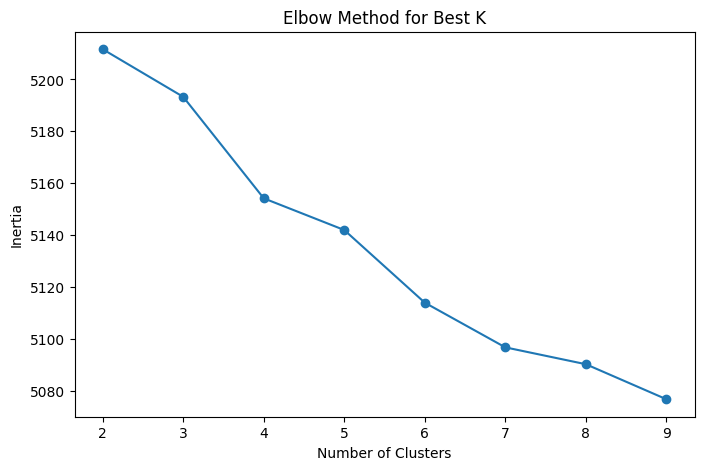

In [ ]:
#QUESTION 2
# Finding optimal K using Elbow Method
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_train)
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Best K')
plt.show()

In [ ]:
k_optimal = 4
kmeans_optimal = KMeans(n_clusters = k_optimal, init = "random", random_state=42, n_init=10)
df['Cluster_K_Optimal'] = kmeans_optimal.fit_predict(X_train)

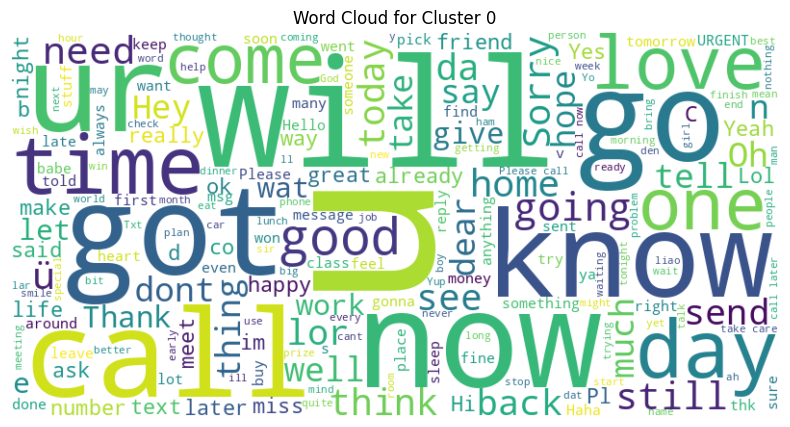

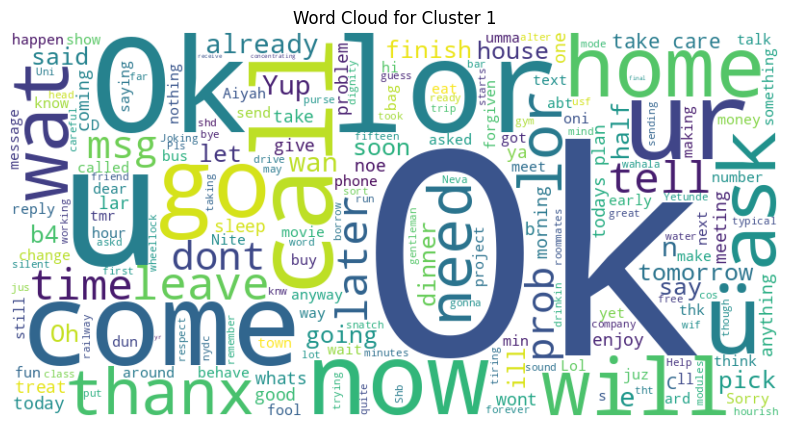

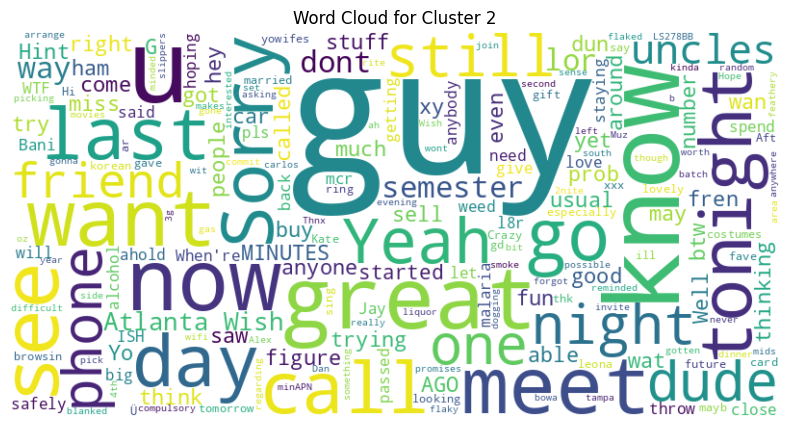

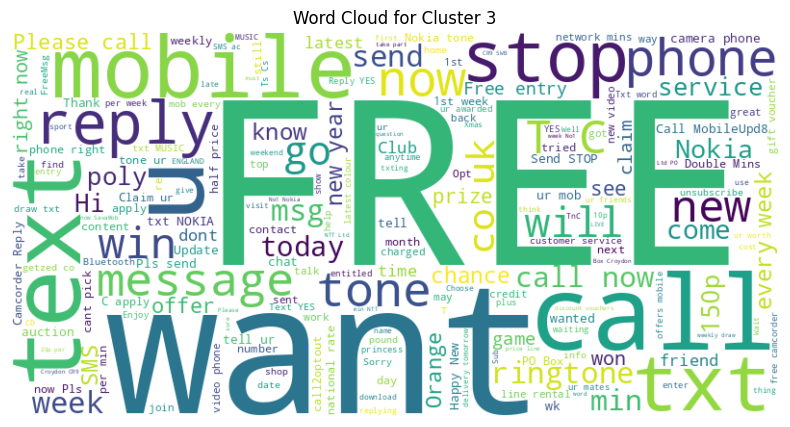

In [ ]:
def word_cloud(cluster_number):
  km_optimal_text = " ".join(df[df["Cluster_K_Optimal"] == cluster_number]["msg"])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(km_optimal_text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Cluster {cluster_number}")
  plt.show()
for i in range(k_optimal):
  word_cloud(i)

In [ ]:

  for cluster in range(k_optimal):
    cluster_data_subset = df[df["Cluster_K_Optimal"] == cluster]
    total_cluster_size = len(cluster_data_subset)
    spam_percentage = (cluster_data_subset['type'] == 'spam').mean() * 100
    print(f"Cluster {cluster}: Total Messages: {total_cluster_size}, {spam_percentage:.2f}% spam")
    print("Representative Messages:")
    print(cluster_data_subset["msg"].sample(3).tolist())


Cluster 0: Total Messages: 4440, 7.61% spam
Representative Messages:
["Then mum's repent how?", 'You have WON a guaranteed £1000 cash or a £2000 prize. To claim yr prize call our customer service representative on 08714712394 between 10am-7pm', 'Sorry * was at the grocers.']
Cluster 1: Total Messages: 193, 0.00% spam
Representative Messages:
['Ok then i will come to ur home after half an hour', 'Did u fix the teeth?if not do it asap.ok take care.', 'Ok which your another number']
Cluster 2: Total Messages: 52, 1.92% spam
Representative Messages:
['My uncles in Atlanta. Wish you guys a great semester.', 'Hello hun how ru? Its here by the way. Im good. Been on 2 dates with that guy i met in walkabout so far. We have to meet up soon. Hows everyone else?', "So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint"]
Cluster 3: Total Messages: 619, 56.06% spam
Representative Messages:
['Final Chance! Claim ur £150 worth of discount vouc

In [ ]:

for cluster in range(k_optimal):
  cluster_data = df[df["Cluster_K_Optimal"] == cluster]
  spam_data = cluster_data[cluster_data["type"] == "spam"]
  ham_data = cluster_data[cluster_data["type"] == "ham"]
  if not spam_data.empty:
      print(f"Spam message in a primarily ham cluster {cluster}: {spam_data.iloc[0]['msg']}")
  if not ham_data.empty:
      print(f"Ham message in a primarily spam cluster {cluster}: {ham_data.iloc[0]['msg']}")



Spam message in a primarily ham cluster 0: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send £1.50 to rcv
Ham message in a primarily spam cluster 0: Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ham message in a primarily spam cluster 1: Ok lar... Joking wif u oni...
Spam message in a primarily ham cluster 2: More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. A£1.50 minAPN LS278BB
Ham message in a primarily spam cluster 2: He will you guys close?
Spam message in a primarily ham cluster 3: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Ham message in a primarily spam cluster 3: Wait that's still not all that clear were you not sure about me being s

In [ ]:
new_text_messages = ["Happy Birthday Luke", "Flash sale happening now! Buy 1 get 1 free on all items! Click here to claim the offer!", "thanx! ur so nice", "Where should we go for lunch today"]

In [ ]:
new_text_messages_vec = vectorizer.transform(new_text_messages)
new_cluster = kmeans_optimal.predict(new_text_messages_vec)
for i, text in enumerate(new_text_messages):
    print(f"Text: {text}")
    print(f"Predicted Cluster: {new_cluster[i]}")

    distances = [np.linalg.norm(new_text_messages_vec[i].toarray() - center)
                 for center in kmeans_optimal.cluster_centers_]
    print(f"Distances to Cluster Centers: {distances}")
    print(f"Closest Cluster: {np.argmin(distances)}")
    print("-" * 20)

Text: Happy Birthday Luke
Predicted Cluster: 0
Distances to Cluster Centers: [0.9980096839110822, 1.110633309907717, 1.0757019755529034, 1.011253346628118]
Closest Cluster: 0
--------------------
Text: Flash sale happening now! Buy 1 get 1 free on all items! Click here to claim the offer!
Predicted Cluster: 3
Distances to Cluster Centers: [0.9996612432981993, 1.1073012824767126, 1.0691725249768635, 0.9918126900008994]
Closest Cluster: 3
--------------------
Text: thanx! ur so nice
Predicted Cluster: 0
Distances to Cluster Centers: [0.9950363139315592, 1.0847310796589378, 1.0757019755529034, 1.0074871746928322]
Closest Cluster: 0
--------------------
Text: Where should we go for lunch today
Predicted Cluster: 0
Distances to Cluster Centers: [0.9961825330217184, 1.104203692210106, 1.0757019755529034, 1.008971589882798]
Closest Cluster: 0
--------------------


In [ ]:
#Question 3: PCA Component

import plotly.express as px
print(f"Total Features in TF-IDF: {X_train.shape[1]}")

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train.toarray())
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]
df["PCA3"] = X_pca[:, 2]


df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["type"] = y.values

fig = px.scatter(df, x="PCA1", y="PCA2", color = "type", hover_data=['msg'])
fig.show()




Total Features in TF-IDF: 6859


In [ ]:
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='type', hover_data=['msg'])
fig.show()

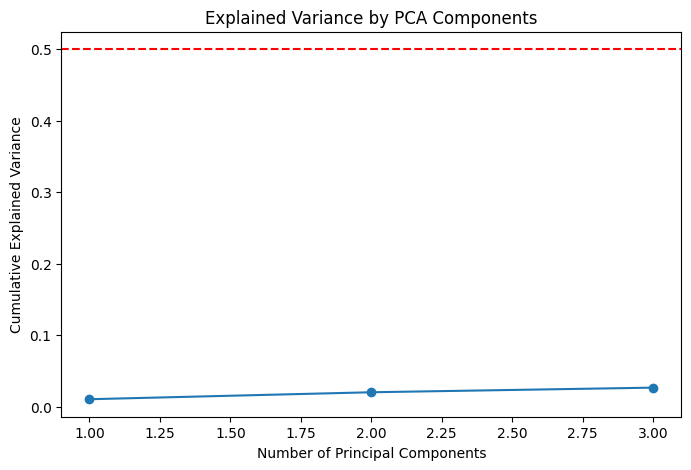

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

In [ ]:
# Identifying Outlier Spam Messages
spam_points = df_pca[df_pca["type"] == "spam"]
outliers = spam_points[np.linalg.norm(spam_points[['PCA1', 'PCA2', 'PCA3']].values, axis=1) > 2.5]
print("Outlier Spam Messages:")
print(outliers)

Outlier Spam Messages:
Empty DataFrame
Columns: [PCA1, PCA2, PCA3, type]
Index: []


In [ ]:
Find the number of components needed to retain >50% variance
pca_full = PCA().fit(X_train.toarray())
cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)
n_components_50 = np.argmax(cumulative_variance_full > 0.50) + 1


In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_full) + 1), cumulative_variance_full, marker='o')
print(len(cumulative_variance_full))
plt.axhline(y=0.5, color='r', linestyle='--', label='50% variance threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Components Needed for >50% Variance")
plt.legend()
plt.show()
print(f"Number of PCA Components Needed to Capture >50% Variance: {n_components_50}")


In [ ]:
#Question 4
#NN Classification-Full Vectorized Space
import time
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
start_time_full = time.time()

X_train_nn_full, X_test_nn_full, y_train_nn_full, y_test_nn_full = train_test_split(X_train, df['type'], test_size=0.2, random_state=42)
knn_full_feature = KNeighborsClassifier(n_neighbors=1)

knn_full_feature.fit(X_train_nn_full, y_train_nn_full)
y_pred_full_feature = knn_full_feature.predict(X_test_nn_full)
end_time_full = time.time()
full_runtime = end_time_full - start_time_full

In [ ]:

#NN Classification-PCA Vectorized Space
start_time_pca = time.time()
X_train_nn_pca, X_test_nn_pca, y_train_nn_pca, y_test_nn_pca = train_test_split(X_pca, df['type'], test_size=0.2, random_state=42)
knn_pca_feature = KNeighborsClassifier(n_neighbors=1)

knn_pca_feature.fit(X_train_nn_pca, y_train_nn_pca)

y_pred_pca_feature = knn_pca_feature.predict(X_test_nn_pca)
end_time_pca = time.time()
pca_runtime = end_time_pca - start_time_pca


In [ ]:
print("NN Full Feature Space Metrics:")
print(f"Accuracy: {accuracy_score(y_test_nn_full, y_pred_full_feature):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_full, y_pred_full_feature, pos_label='spam'):.4f}")
print(f"Runtime: {full_runtime:.4f} seconds")


print("NN PCA Feature Space Metrics:")
print(f"Accuracy: {accuracy_score(y_test_nn_pca, y_pred_pca_feature):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_pca, y_pred_pca_feature, pos_label='spam'):.4f}")
print(f"Runtime: {pca_runtime:.4f} seconds")


NN Full Feature Space Metrics:
Accuracy: 0.9491
F1 Score: 0.7731
Runtime: 0.0823 seconds
NN PCA Feature Space Metrics:
Accuracy: 0.9142
F1 Score: 0.6784
Runtime: 0.0577 seconds


n_neighbors=1: Accuracy=0.9142, F1 Score=0.6784
n_neighbors=2: Accuracy=0.9237, F1 Score=0.6524
n_neighbors=3: Accuracy=0.9237, F1 Score=0.7097
n_neighbors=4: Accuracy=0.9142, F1 Score=0.6224
n_neighbors=5: Accuracy=0.9199, F1 Score=0.6768
n_neighbors=6: Accuracy=0.9123, F1 Score=0.6173
n_neighbors=7: Accuracy=0.9189, F1 Score=0.6667
n_neighbors=8: Accuracy=0.9180, F1 Score=0.6506
n_neighbors=9: Accuracy=0.9227, F1 Score=0.6822
n_neighbors=10: Accuracy=0.9171, F1 Score=0.6423
n_neighbors=11: Accuracy=0.9208, F1 Score=0.6719
n_neighbors=12: Accuracy=0.9180, F1 Score=0.6506
n_neighbors=13: Accuracy=0.9180, F1 Score=0.6717
n_neighbors=14: Accuracy=0.9199, F1 Score=0.6640
n_neighbors=15: Accuracy=0.9218, F1 Score=0.6844
n_neighbors=16: Accuracy=0.9189, F1 Score=0.6587
n_neighbors=17: Accuracy=0.9208, F1 Score=0.6818
n_neighbors=18: Accuracy=0.9199, F1 Score=0.6693
n_neighbors=19: Accuracy=0.9218, F1 Score=0.6844
n_neighbors=20: Accuracy=0.9208, F1 Score=0.6693


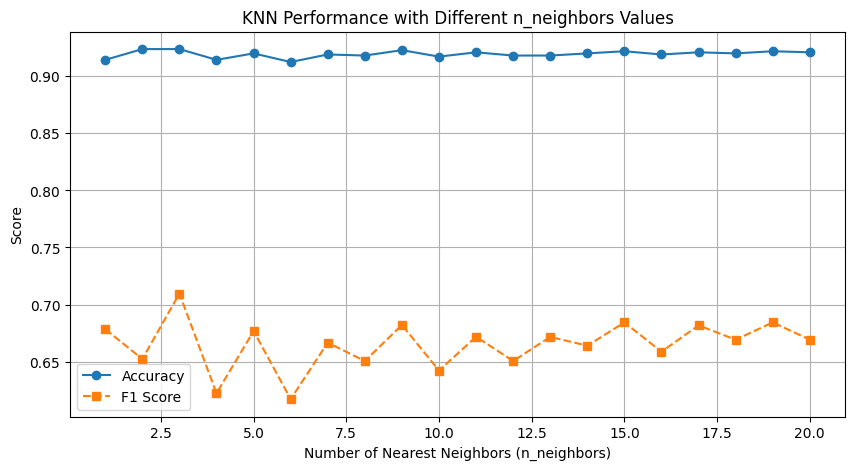

In [ ]:
## Question 5: Spam classification using KNN and PCA

n_neighbors_values = range(1, 21)
accuracy_scores = []
f1_scores = []
for n in n_neighbors_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train_nn_pca, y_train_nn_pca)
    y_pred = knn_classifier.predict(X_test_nn_pca)
    accuracy_scores.append(accuracy_score(y_test_nn_pca, y_pred))
    f1_scores.append(f1_score(y_test_nn_pca, y_pred, pos_label='spam'))
    print(f"n_neighbors={n}: Accuracy={accuracy_scores[-1]:.4f}, F1 Score={f1_scores[-1]:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, accuracy_scores, marker='o', label='Accuracy')
plt.plot(n_neighbors_values, f1_scores, marker='s', label='F1 Score', linestyle='dashed')
plt.xlabel("Number of Nearest Neighbors (n_neighbors)")
plt.ylabel("Score")
plt.title("KNN Performance with Different n_neighbors Values")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Final KNN Classifier with Optimal n_neighbors
optimal_n = n_neighbors_values[np.argmax(f1_scores)]
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_n)
knn_classifier.fit(X_train_nn_pca, y_train_nn_pca)
y_pred_final = knn_classifier.predict(X_test_nn_pca)

print("Final Spam Classifier Performance with Optimal k:")
print(f"Optimal n_neighbors: {optimal_n}")
print(f"Accuracy: {accuracy_score(y_test_nn_pca, y_pred_final):.4f}")
print(f"F1 Score: {f1_score(y_test_nn_pca, y_pred_final, pos_label='spam'):.4f}")

Final Spam Classifier Performance with Optimal k:
Optimal n_neighbors: 3
Accuracy: 0.9237
F1 Score: 0.7097


In [ ]:
# Compare TF-IDF with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

stemmed_vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')
vectorizer_count = CountVectorizer(tokenizer=custom_tokenizer, stop_words='english', max_features=5000)
X_tfidf = stemmed_vectorizer.fit_transform(df['msg'])
X_count = vectorizer_count.fit_transform(df['msg'])



/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
X_pca_tfidf = pca.fit_transform(X_tfidf.toarray())
X_pca_count = pca.fit_transform(X_count.toarray())
X_train_pca_tfidf, X_test_pca_tfidf, y_train, y_test= train_test_split(X_pca_tfidf, df['type'], test_size=0.2, random_state=42)
X_train_pca_count, X_test_pca_count, y_train, y_test = train_test_split(X_pca_count, df['type'], test_size=0.2, random_state=42)



In [ ]:

start_pca_tfidf = time.time()
knn_pca_tfidf = KNeighborsClassifier(n_neighbors=optimal_n)
knn_pca_tfidf.fit(X_train_pca_tfidf, y_train)
y_pred_pca_tfidf = knn_pca_tfidf.predict(X_test_pca_tfidf)
end_pca_tfidf = time.time()
pca_tfidf_runtime = end_pca_tfidf - start_pca_tfidf

start_pca_count = time.time()
knn_pca_count = KNeighborsClassifier(n_neighbors=optimal_n)
knn_pca_count.fit(X_train_pca_count, y_train)
y_pred_pca_count = knn_pca_count.predict(X_test_pca_count)
end_pca_count = time.time()
pca_count_runtime = end_pca_count - start_pca_count




In [ ]:

accuracy_pca_tfidf = accuracy_score(y_test, y_pred_pca_tfidf)
f1_pca_tfidf = f1_score(y_test, y_pred_pca_tfidf, pos_label='spam')
accuracy_pca_count = accuracy_score(y_test, y_pred_pca_count)
f1_pca_count = f1_score(y_test, y_pred_pca_count, pos_label='spam')



KNN with PCA + TF-IDF Performance:
Accuracy: 0.9227, F1 Score: 0.7029, Runtime: 0.0774 sec
KNN with PCA + CountVectorizer Performance:
Accuracy: 0.9491, F1 Score: 0.8043, Runtime: 0.0347 sec


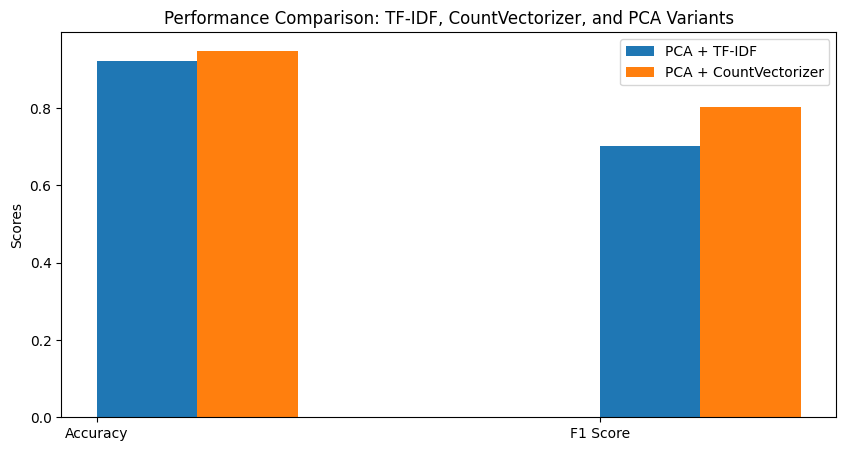

In [ ]:
print("KNN with PCA + TF-IDF Performance:")
print(f"Accuracy: {accuracy_pca_tfidf:.4f}, F1 Score: {f1_pca_tfidf:.4f}, Runtime: {pca_tfidf_runtime:.4f} sec")
print("KNN with PCA + CountVectorizer Performance:")
print(f"Accuracy: {accuracy_pca_count:.4f}, F1 Score: {f1_pca_count:.4f}, Runtime: {pca_count_runtime:.4f} sec")

labels = ['Accuracy', 'F1 Score']
pca_tfidf_scores = [accuracy_pca_tfidf, f1_pca_tfidf]
pca_count_scores = [accuracy_pca_count, f1_pca_count]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x + 0.5*width, pca_tfidf_scores, width, label='PCA + TF-IDF')
ax.bar(x + 1.5*width, pca_count_scores, width, label='PCA + CountVectorizer')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: TF-IDF, CountVectorizer, and PCA Variants')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()